##**IS695 - Deep Learning Project**
### **H&M Dataset**<br>
We are helping H&M by making a deep learning neural network to recommend people clothing and accessories on the basis of their purchases.<br><br>
**Business value and importance of the problem:** This recommender system could help customers make the right choices, which also has a positive implications for sustainability, as it reduces returns, and thereby minimizes emissions from transportation.<br><br>
**Dataset Description:**<br>
1. **article.csv:** It gives us the insight on the products.<br> article_id<br>product_code<br>prod_name<br>product_type_no<br>product_type_name
2. **customers.csv:** It gives us the insight about the customers we have.<br>customer_id<br>club_member_status<br>age<br>postal_code
3. **transaction_train.csv:** This gives us the insight about the transactions made by customers for the product.<br>t_dat<br>article_id<br>customer_id<br>price<br><br>-- We will only use data for 2000 unique customers for the prediction.


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from itertools import chain
import torch
import torch.nn as nn
import torch.optim as optim

## Uploading and cleaning data

In [ ]:
# Read product data
products_df = pd.read_csv('/content/drive/MyDrive/DL_data/articles.csv')
products_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
# Read customer data
customers_df = pd.read_csv('/content/drive/MyDrive/DL_data/customers.csv')
customers_df = customers_df.head(5000)
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
4995,00f19eeb07bcba88c437827c51db1af3e31159c083af2b...,NaN,NaN,ACTIVE,NONE,24.0,2fc792fa57e57c9c7c7e3a1a182cc445a858cdcab8737e...
4996,00f1af5a3a0dd1abe9c1adf89a283ece5540d2abaf82fc...,NaN,NaN,ACTIVE,NONE,36.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
4997,00f1b16321c93da6fb8ee4eb7a946daad3947774f3701f...,1.0,1.0,ACTIVE,Regularly,28.0,9ebff6beb46c177aedb71722db59014f0373cf6ed4e32f...
4998,00f1b9f03cf15edd7713f69b538be241132f7dd98274e4...,NaN,NaN,ACTIVE,NONE,28.0,80c4963dd171ec528aac6eef5de0de5754631cb2694cda...


In [ ]:
# Read transaction data
transactions_df = pd.read_csv('/content/drive/MyDrive/DL_data/transactions_train.csv')
transactions_df

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [ ]:
# Create one merged DataFrame of customers, products, and transactions data(We are only using 5000 customers for our analysis)
merged_data = pd.merge(customers_df, transactions_df, how = 'inner',on='customer_id')
merged_df = pd.merge(merged_data, products_df, how = 'inner',on='article_id') 
merged_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,625548001,0.044051,...,Young Boy Outdoor,I,Children Sizes 134-170,4,Baby/Children,45,Kids Outerwear,1007,Outdoor,"Padded jacket with a detachable hood, stand-up..."
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,176209023,0.035576,...,Jacket Street,F,Menswear,3,Menswear,31,Mens Outerwear,1007,Outdoor,"Short, padded jacket with a jersey-lined hood ..."
2,0085558e99d076a43ca09c37f3b8e5bd8e2fe8ab51b595...,1.0,1.0,ACTIVE,Regularly,49.0,cfefb8a326d65ae4d874cec3043cc80110d7efdfb4a12b...,2018-12-23,176209023,0.035576,...,Jacket Street,F,Menswear,3,Menswear,31,Mens Outerwear,1007,Outdoor,"Short, padded jacket with a jersey-lined hood ..."
3,0090c0bb62e94f069ee7892db19d2fb546ff3c7cf7b79d...,1.0,1.0,ACTIVE,Regularly,33.0,b18e1c51bb1858ceb7fe0f5af4be3c7cfb5852d056f916...,2019-01-26,176209023,0.035576,...,Jacket Street,F,Menswear,3,Menswear,31,Mens Outerwear,1007,Outdoor,"Short, padded jacket with a jersey-lined hood ..."
4,00b358a9e9d630cca13667215d71a49ce26aba30527000...,NaN,NaN,ACTIVE,NONE,44.0,d4a5822c8246d1e320815613f9317689c21e595a2b3aa7...,2019-04-12,176209023,0.067780,...,Jacket Street,F,Menswear,3,Menswear,31,Mens Outerwear,1007,Outdoor,"Short, padded jacket with a jersey-lined hood ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117429,00f1b16321c93da6fb8ee4eb7a946daad3947774f3701f...,1.0,1.0,ACTIVE,Regularly,28.0,9ebff6beb46c177aedb71722db59014f0373cf6ed4e32f...,2019-10-19,562252010,0.009593,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,Skinny-fit treggings in superstretch twill wit...
117430,00f1b16321c93da6fb8ee4eb7a946daad3947774f3701f...,1.0,1.0,ACTIVE,Regularly,28.0,9ebff6beb46c177aedb71722db59014f0373cf6ed4e32f...,2020-02-17,630304005,0.018847,...,Shoes / Boots inactive from s5,F,Menswear,3,Menswear,27,Men Shoes,1020,Shoes,Derby shoes in imitation leather with open lac...
117431,00f1b16321c93da6fb8ee4eb7a946daad3947774f3701f...,1.0,1.0,ACTIVE,Regularly,28.0,9ebff6beb46c177aedb71722db59014f0373cf6ed4e32f...,2020-02-17,561445007,0.002492,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,"Short-sleeved, fitted jersey top with a slight..."
117432,00f1b16321c93da6fb8ee4eb7a946daad3947774f3701f...,1.0,1.0,ACTIVE,Regularly,28.0,9ebff6beb46c177aedb71722db59014f0373cf6ed4e32f...,2020-07-13,685601026,0.012492,...,Swimwear,F,Menswear,3,Menswear,26,Men Underwear,1018,Swimwear,Swim shorts in a patterned weave with an elast...


In [ ]:
# Encode customer_id and price for the merged_df data frame to do the analysis
label_encoder = preprocessing.LabelEncoder()
merged_df['customer_id'] = label_encoder.fit_transform(merged_df['customer_id'])
merged_df['price'] = label_encoder.fit_transform(merged_df['price'])
merged_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,625548001,2071,...,Young Boy Outdoor,I,Children Sizes 134-170,4,Baby/Children,45,Kids Outerwear,1007,Outdoor,"Padded jacket with a detachable hood, stand-up..."
1,0,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,176209023,1769,...,Jacket Street,F,Menswear,3,Menswear,31,Mens Outerwear,1007,Outdoor,"Short, padded jacket with a jersey-lined hood ..."
2,2765,1.0,1.0,ACTIVE,Regularly,49.0,cfefb8a326d65ae4d874cec3043cc80110d7efdfb4a12b...,2018-12-23,176209023,1769,...,Jacket Street,F,Menswear,3,Menswear,31,Mens Outerwear,1007,Outdoor,"Short, padded jacket with a jersey-lined hood ..."
3,3006,1.0,1.0,ACTIVE,Regularly,33.0,b18e1c51bb1858ceb7fe0f5af4be3c7cfb5852d056f916...,2019-01-26,176209023,1769,...,Jacket Street,F,Menswear,3,Menswear,31,Mens Outerwear,1007,Outdoor,"Short, padded jacket with a jersey-lined hood ..."
4,3661,NaN,NaN,ACTIVE,NONE,44.0,d4a5822c8246d1e320815613f9317689c21e595a2b3aa7...,2019-04-12,176209023,2659,...,Jacket Street,F,Menswear,3,Menswear,31,Mens Outerwear,1007,Outdoor,"Short, padded jacket with a jersey-lined hood ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117429,4959,1.0,1.0,ACTIVE,Regularly,28.0,9ebff6beb46c177aedb71722db59014f0373cf6ed4e32f...,2019-10-19,562252010,430,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,Skinny-fit treggings in superstretch twill wit...
117430,4959,1.0,1.0,ACTIVE,Regularly,28.0,9ebff6beb46c177aedb71722db59014f0373cf6ed4e32f...,2020-02-17,630304005,933,...,Shoes / Boots inactive from s5,F,Menswear,3,Menswear,27,Men Shoes,1020,Shoes,Derby shoes in imitation leather with open lac...
117431,4959,1.0,1.0,ACTIVE,Regularly,28.0,9ebff6beb46c177aedb71722db59014f0373cf6ed4e32f...,2020-02-17,561445007,55,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,"Short-sleeved, fitted jersey top with a slight..."
117432,4959,1.0,1.0,ACTIVE,Regularly,28.0,9ebff6beb46c177aedb71722db59014f0373cf6ed4e32f...,2020-07-13,685601026,596,...,Swimwear,F,Menswear,3,Menswear,26,Men Underwear,1018,Swimwear,Swim shorts in a patterned weave with an elast...


In [ ]:
# Sort data based on 'customer_id' and 'date of purchase'
merged_df = merged_df.sort_values(by=['customer_id', 't_dat'], ascending=False)
merged_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
24868,4961,NaN,NaN,ACTIVE,NONE,21.0,d578204cea88f2bbcd886724cf92d2e269a68d574ae3da...,2020-04-08,827681002,2122,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,"5-pocket jeans in washed, stretch denim with h..."
35297,4961,NaN,NaN,ACTIVE,NONE,21.0,d578204cea88f2bbcd886724cf92d2e269a68d574ae3da...,2020-04-08,799365011,2122,...,Denim Trousers,D,Divided,2,Divided,57,Ladies Denim,1016,Trousers Denim,"5-pocket, ankle-length jeans in washed denim w..."
21146,4960,NaN,NaN,ACTIVE,NONE,28.0,80c4963dd171ec528aac6eef5de0de5754631cb2694cda...,2018-12-23,570002002,656,...,Light Basic Jersey,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,Round-necked T-shirt in soft jersey.
98935,4960,NaN,NaN,ACTIVE,NONE,28.0,80c4963dd171ec528aac6eef5de0de5754631cb2694cda...,2018-12-23,570003001,656,...,Light Basic Jersey,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,V-neck T-shirt in soft cotton jersey.
12835,4959,1.0,1.0,ACTIVE,Regularly,28.0,9ebff6beb46c177aedb71722db59014f0373cf6ed4e32f...,2020-07-13,679284001,773,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",Super push-up bra in lace with decorative lace...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-25,568601006,2319,...,Suit,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1008,Dressed,Fitted jacket in woven fabric with notch lapel...
7,0,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-02,697138006,462,...,Kids Girl Jersey Fancy,H,Children Sizes 92-140,4,Baby/Children,76,Kids Girl,1005,Jersey Fancy,Playsuit in cotton jersey with butterfly sleev...
0,0,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,625548001,2071,...,Young Boy Outdoor,I,Children Sizes 134-170,4,Baby/Children,45,Kids Outerwear,1007,Outdoor,"Padded jacket with a detachable hood, stand-up..."
1,0,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,176209023,1769,...,Jacket Street,F,Menswear,3,Menswear,31,Mens Outerwear,1007,Outdoor,"Short, padded jacket with a jersey-lined hood ..."


## Data Exploration and analyses

We will answer the following questions here:
1. Which product is the most popular within customers? 
2. What is the average amount people are spending in each transaction?
3. What were the months when people purchased the most?

In [ ]:
# Count of most popular product
merged_df['product_type_name'].value_counts()

Trousers           15430
Dress              12261
Sweater            10108
T-shirt             7975
Top                 5872
                   ...  
Flat shoes             1
Sleeping sack          1
Weekend/Gym bag        1
Long John              1
Bumbag                 1
Name: product_type_name, Length: 111, dtype: int64

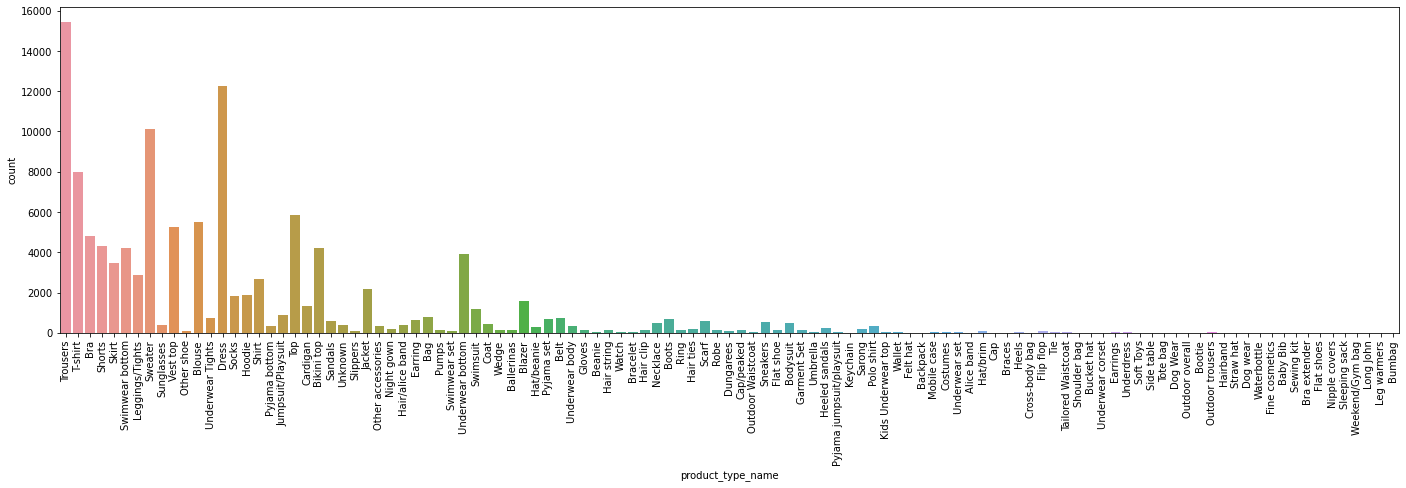

In [ ]:
# Plot for the most popular product
plt.figure(figsize=(24,6))
plt.xticks(rotation = 90)
sns.countplot(x ='product_type_name', data = merged_df)

In [ ]:
# Average amount spent per transaction
merged_df['price'].mean()

1302.5194066454349

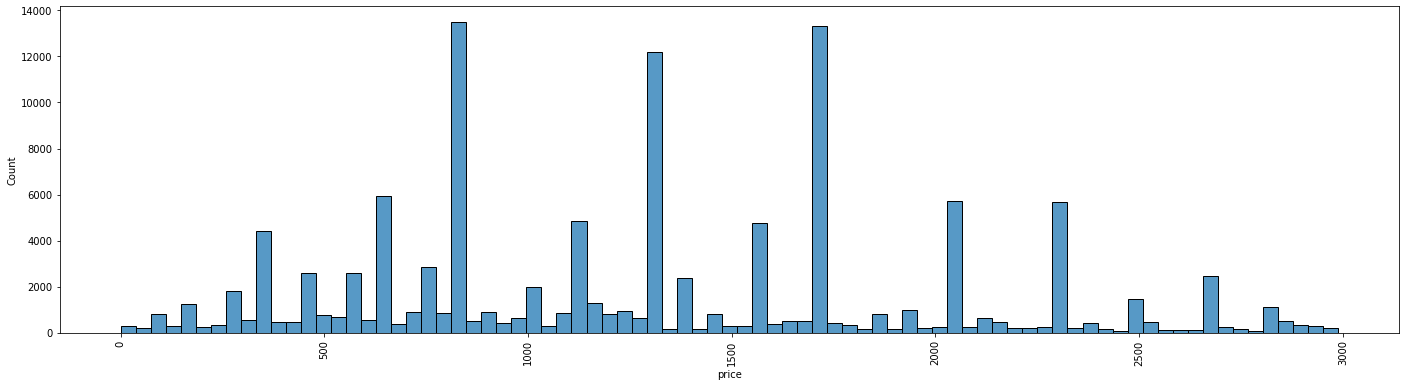

In [ ]:
# Plot for average amount spent per transaction(Note that the price is encoded)
plt.figure(figsize=(24,6))
plt.xticks(rotation = 90)
sns.histplot(x ='price', data = merged_df)

In [ ]:
# Finding which month has most transactions 
merged_df = merged_df.sort_values(by=['t_dat'], ascending=False)
merged_df['t_dat'] = pd.to_datetime(merged_df['t_dat']).dt.to_period('M')
merged_df['t_dat'].value_counts()


2019-06    7514
2019-07    6744
2020-06    6315
2019-05    5923
2020-05    5210
2018-10    5175
2019-04    5097
2020-07    5057
2019-09    4883
2019-01    4872
2020-04    4806
2019-08    4621
2019-03    4578
2018-11    4524
2020-08    4524
2019-11    4396
2019-10    4232
2019-02    4155
2018-12    4144
2020-01    3883
2019-12    3836
2020-03    3751
2020-02    3630
2020-09    2992
2018-09    2572
Freq: M, Name: t_dat, dtype: int64

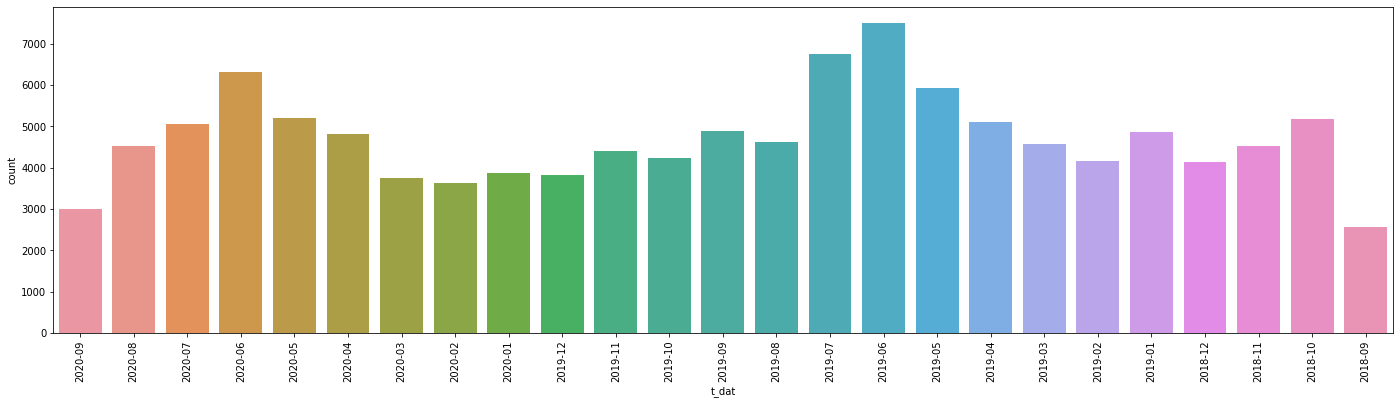

In [ ]:
# Plot for months that has most transactions
# Turns out June is the month of summer sale in H&M which yield the most transactions, and not black friday(i.e. November)
plt.figure(figsize=(24,6))
plt.xticks(rotation = 90)
sns.countplot(x = 't_dat', data = merged_df)

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/IS695 Final Project_Analysis_Group 6.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/IS695 Final Project_Analysis_Group 6.ipynb to html
[NbConvertApp] Writing 459125 bytes to /content/drive/MyDrive/Colab Notebooks/IS695 Final Project_Analysis_Group 6.html
